In [2]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
from scipy import stats

df_vaccination_raw = pd.read_csv('data/country_vaccinations.csv')
df_population_raw = pd.read_csv('data/population_by_country_2020.csv')

In [3]:
df_vaccination_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8451 entries, 0 to 8450
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              8451 non-null   object 
 1   iso_code                             8451 non-null   object 
 2   date                                 8451 non-null   object 
 3   total_vaccinations                   5231 non-null   float64
 4   people_vaccinated                    4688 non-null   float64
 5   people_fully_vaccinated              3186 non-null   float64
 6   daily_vaccinations_raw               4415 non-null   float64
 7   daily_vaccinations                   8260 non-null   float64
 8   total_vaccinations_per_hundred       5231 non-null   float64
 9   people_vaccinated_per_hundred        4688 non-null   float64
 10  people_fully_vaccinated_per_hundred  3186 non-null   float64
 11  daily_vaccinations_per_million

In [4]:
df_vaccination = df_vaccination_raw[['country','people_vaccinated_per_hundred']]
df_vaccination

,country,people_vaccinated_per_hundred
0,Afghanistan,0.00
1,Afghanistan,NaN
2,Afghanistan,NaN
3,Afghanistan,NaN
4,Afghanistan,NaN
...,...,...
8446,Zimbabwe,0.30
8447,Zimbabwe,0.33
8448,Zimbabwe,0.37
8449,Zimbabwe,0.41


In [5]:
df_vaccination.country.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua and Barbuda', 'Argentina', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Bermuda', 'Bolivia',
       'Brazil', 'Bulgaria', 'Cambodia', 'Canada', 'Cayman Islands',
       'Chile', 'China', 'Colombia', 'Costa Rica', "Cote d'Ivoire",
       'Croatia', 'Cyprus', 'Czechia', 'Denmark', 'Dominica',
       'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'England',
       'Equatorial Guinea', 'Estonia', 'Faeroe Islands',
       'Falkland Islands', 'Finland', 'France', 'Germany', 'Ghana',
       'Gibraltar', 'Greece', 'Greenland', 'Grenada', 'Guatemala',
       'Guernsey', 'Guinea', 'Guyana', 'Honduras', 'Hong Kong', 'Hungary',
       'Iceland', 'India', 'Indonesia', 'Iran', 'Ireland', 'Isle of Man',
       'Israel', 'Italy', 'Jamaica', 'Japan', 'Jersey', 'Jordan',
       'Kazakhstan', 'Kenya', 'Kuwait', 'Laos

In [6]:
# show the max total_vaccinations_per_hundred
vaccination_max_country = df_vaccination.groupby('country').max()
vaccination_max_country

,people_vaccinated_per_hundred
country,
Afghanistan,0.14
Albania,0.21
Algeria,NaN
Andorra,9.19
Angola,0.26
...,...
Uruguay,14.67
Venezuela,0.04
Vietnam,0.05


In [7]:
vaccination_max_country.dropna()

,people_vaccinated_per_hundred
country,
Afghanistan,0.14
Albania,0.21
Andorra,9.19
Angola,0.26
Anguilla,35.65
...,...
Uruguay,14.67
Venezuela,0.04
Vietnam,0.05


In [8]:
df_population_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country (or dependency)  235 non-null    object 
 1   Population (2020)        235 non-null    int64  
 2   Yearly Change            235 non-null    object 
 3   Net Change               235 non-null    int64  
 4   Density (P/Km²)          235 non-null    int64  
 5   Land Area (Km²)          235 non-null    int64  
 6   Migrants (net)           201 non-null    float64
 7   Fert. Rate               235 non-null    object 
 8   Med. Age                 235 non-null    object 
 9   Urban Pop %              235 non-null    object 
 10  World Share              235 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 20.3+ KB


In [9]:
df_population_raw.head()

,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,China,1440297825,0.39 %,5540090,153,9388211,-348399.0,1.7,38,61 %,18.47 %
1,India,1382345085,0.99 %,13586631,464,2973190,-532687.0,2.2,28,35 %,17.70 %
2,United States,331341050,0.59 %,1937734,36,9147420,954806.0,1.8,38,83 %,4.25 %
3,Indonesia,274021604,1.07 %,2898047,151,1811570,-98955.0,2.3,30,56 %,3.51 %
4,Pakistan,221612785,2.00 %,4327022,287,770880,-233379.0,3.6,23,35 %,2.83 %


In [10]:
df_population_raw.columns

Index(['Country (or dependency)', 'Population (2020)', 'Yearly Change',
       'Net Change', 'Density (P/Km²)', 'Land Area (Km²)', 'Migrants (net)',
       'Fert. Rate', 'Med. Age', 'Urban Pop %', 'World Share'],
      dtype='object')

In [11]:
df_population = df_population_raw[['Country (or dependency)', 'Population (2020)']]

In [12]:
df_population.columns = ['country','population']
#df_population = df_population.population.astype(str)
df_population

,country,population
0,China,1440297825
1,India,1382345085
2,United States,331341050
3,Indonesia,274021604
4,Pakistan,221612785
...,...,...
230,Montserrat,4993
231,Falkland Islands,3497
232,Niue,1628
233,Tokelau,1360


In [13]:
df_population.set_index('country', inplace=True)

In [14]:
df_population

,population
country,
China,1440297825
India,1382345085
United States,331341050
Indonesia,274021604
Pakistan,221612785
...,...
Montserrat,4993
Falkland Islands,3497
Niue,1628


In [15]:
df_population.index.unique()

Index(['China', 'India', 'United States', 'Indonesia', 'Pakistan', 'Brazil',
       'Nigeria', 'Bangladesh', 'Russia', 'Mexico',
       ...
       'Wallis & Futuna', 'Nauru', 'Saint Barthelemy', 'Saint Helena',
       'Saint Pierre & Miquelon', 'Montserrat', 'Falkland Islands', 'Niue',
       'Tokelau', 'Holy See'],
      dtype='object', name='country', length=235)

In [16]:
df_population['population'] = df_population['population'].astype(str)

<ipython-input-16-c3496bb546cb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_population['population'] = df_population['population'].astype(str)


In [17]:
vac_pop = pd.merge(vaccination_max_country, df_population, left_index=True, right_index=True, how='left')

In [18]:
vac_pop.head()

,people_vaccinated_per_hundred,population
country,,
Afghanistan,0.14,39074280
Albania,0.21,2877239
Algeria,NaN,43984569
Andorra,9.19,77287
Angola,0.26,33032075


In [19]:
vac_pop.shape

(154, 2)

In [20]:
vac_pop.population.isnull()

country
Afghanistan    False
Albania        False
Algeria        False
Andorra        False
Angola         False
               ...  
Uruguay        False
Venezuela      False
Vietnam        False
Wales           True
Zimbabwe       False
Name: population, Length: 154, dtype: bool

In [21]:
vac_pop[vac_pop.population.isnull()]

,people_vaccinated_per_hundred,population
country,,
Cote d'Ivoire,0.12,NaN
Czechia,10.47,NaN
England,44.92,NaN
Guernsey,32.06,NaN
Jersey,42.68,NaN
Northern Cyprus,14.10,NaN
Northern Ireland,37.98,NaN
Saint Kitts and Nevis,14.25,NaN
Saint Vincent and the Grenadines,NaN,NaN


In [22]:
vaccination_max_country.rename(index={'Czechia':'Czech Republic (Czechia)'}, inplace=True)

In [23]:
vaccination_max_country.loc['Czech Republic (Czechia)',:]

people_vaccinated_per_hundred    10.47
Name: Czech Republic (Czechia), dtype: float64

In [24]:
vac_pop2 = pd.merge(vaccination_max_country, df_population, left_index=True, right_index=True, how='left')

In [25]:
vac_pop2.isnull().sum()

people_vaccinated_per_hundred    12
population                       11
dtype: int64

In [26]:
vac_pop3 = vac_pop2.dropna()

In [27]:
vac_pop3

,people_vaccinated_per_hundred,population
country,,
Afghanistan,0.14,39074280
Albania,0.21,2877239
Andorra,9.19,77287
Angola,0.26,33032075
Anguilla,35.65,15026
...,...,...
United States,27.42,331341050
Uruguay,14.67,3475842
Venezuela,0.04,28421581


In [28]:
vac_pop3['population'] = vac_pop2.population.astype(float)

<ipython-input-28-29acfceb4e62>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vac_pop3['population'] = vac_pop2.population.astype(float)


In [29]:
vac_pop3.head()

,people_vaccinated_per_hundred,population
country,,
Afghanistan,0.14,39074280.0
Albania,0.21,2877239.0
Andorra,9.19,77287.0
Angola,0.26,33032075.0
Anguilla,35.65,15026.0


In [30]:
vac_pop3['people_vaccinated_per_hundred']

country
Afghanistan       0.14
Albania           0.21
Andorra           9.19
Angola            0.26
Anguilla         35.65
                 ...  
United States    27.42
Uruguay          14.67
Venezuela         0.04
Vietnam           0.05
Zimbabwe          0.44
Name: people_vaccinated_per_hundred, Length: 132, dtype: float64

[10.059624819647397, 10.427501581993992, 10.455957976440319, 10.121032789786016, 10.456590745707299, 9.996682576374381, 10.197067465294595, 10.3651187908634, 10.353536667002086, 10.452740255129354, 10.439353690525925, 8.780101069583642, 10.453822185793587, 10.36071396021867, 10.338866402275896, 10.452689927100412, 10.456110932182566, 10.337832238521203, 8.293796956855294, 10.386221022406609, 10.286424463994859, 10.072581573533524, 10.456074171988565, 10.262173539406557, 9.938663068840395, 10.404889346971702, 10.415067144018915, 10.444457340894042, 10.347870667987456, 10.397839947114615, 10.456011536358035, 10.346303649112095, 10.276971179170461, 10.390764925900305, 10.442409126302524, 10.443260048061687, 10.456246519063452, 10.456707916920081, 10.40041674829446, 9.793099184701914, 9.604754849853352, 10.139841234006814, 10.456401070423741, 10.350904832244549, 10.456166321471287, 10.455598942054513, 10.27409720683425, 10.448742855896647, 10.355809609658227, 10.38044320817097, 10.35860803

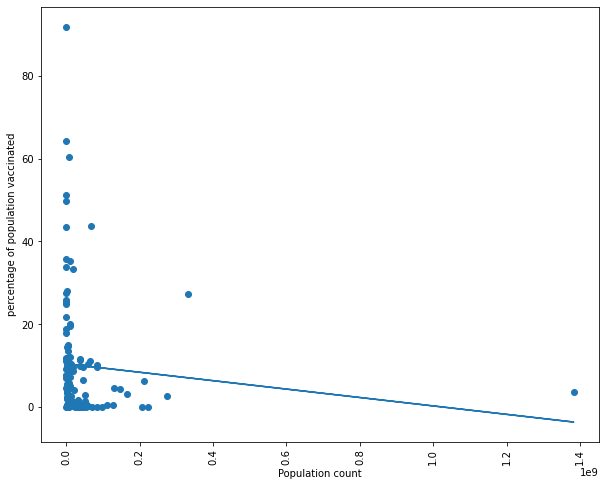

In [31]:


fig, ax = plt.subplots(figsize=(10, 8))
#df= pd.read_csv('population_by_hundred2.csv')
x = vac_pop3['population']
y = vac_pop3['people_vaccinated_per_hundred']


plt.xlabel("Population count")
plt.ylabel("percentage of population vaccinated")


slope, intercept, r, p, std_err = stats.linregress(x, y)


def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))

print (mymodel)
plt.xticks(rotation=90)
plt.scatter(x,y)
plt.plot(x, mymodel)

In [32]:
# GDP
df_gdp_raw = pd.read_csv('data/API_NY.GDP.MKTP.CD_DS2_en_csv_v2_2163564.csv')

In [33]:
df_gdp_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264 entries, 0 to 263
Data columns (total 65 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    264 non-null    object 
 1   Country Code    264 non-null    object 
 2   Indicator Name  264 non-null    object 
 3   Indicator Code  264 non-null    object 
 4   1960            131 non-null    float64
 5   1961            132 non-null    float64
 6   1962            135 non-null    float64
 7   1963            135 non-null    float64
 8   1964            135 non-null    float64
 9   1965            144 non-null    float64
 10  1966            148 non-null    float64
 11  1967            152 non-null    float64
 12  1968            156 non-null    float64
 13  1969            156 non-null    float64
 14  1970            167 non-null    float64
 15  1971            168 non-null    float64
 16  1972            168 non-null    float64
 17  1973            168 non-null    flo

In [34]:
df_gdp_raw.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.549721e+09,2.534637e+09,2.701676e+09,2.765363e+09,2.919553e+09,2.965922e+09,3.056425e+09,NaN,NaN,NaN
1,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,537777811.1,548888895.6,546666677.8,751111191.1,800000044.4,1.006667e+09,...,1.780429e+10,2.000160e+10,2.056107e+10,2.048489e+10,1.990711e+10,1.801775e+10,1.886995e+10,1.835388e+10,1.929110e+10,NaN
2,Angola,AGO,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.117900e+11,1.280530e+11,1.367100e+11,1.457120e+11,1.161940e+11,1.011240e+11,1.221240e+11,1.013530e+11,8.881570e+10,NaN
3,Albania,ALB,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,1.289077e+10,1.231983e+10,1.277622e+10,1.322814e+10,1.138685e+10,1.186120e+10,1.301969e+10,1.514702e+10,1.527918e+10,NaN
4,Andorra,AND,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,3.629204e+09,3.188809e+09,3.193704e+09,3.271808e+09,2.789870e+09,2.896679e+09,3.000181e+09,3.218316e+09,3.154058e+09,NaN


In [48]:
df_gdp = df_gdp_raw[['Country Name', '2019']]

In [49]:
df_gdp

,Country Name,2019
0,Aruba,NaN
1,Afghanistan,1.929110e+10
2,Angola,8.881570e+10
3,Albania,1.527918e+10
4,Andorra,3.154058e+09
...,...,...
259,Kosovo,7.926134e+09
260,"Yemen, Rep.",2.258108e+10
261,South Africa,3.514320e+11
262,Zambia,2.330977e+10


In [50]:
df_gdp.dropna()

,Country Name,2019
1,Afghanistan,1.929110e+10
2,Angola,8.881570e+10
3,Albania,1.527918e+10
4,Andorra,3.154058e+09
5,Arab World,2.817410e+12
...,...,...
259,Kosovo,7.926134e+09
260,"Yemen, Rep.",2.258108e+10
261,South Africa,3.514320e+11
262,Zambia,2.330977e+10


In [51]:
df_gdp.columns=['country', '2019']
df_gdp['2019'] = df_gdp['2019'].astype(str)

<ipython-input-51-78943a60e71e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gdp['2019'] = df_gdp['2019'].astype(str)


In [53]:
df_gdp.set_index('country')

,2019
country,
Aruba,nan
Afghanistan,19291104008.0
Angola,88815697793.0
Albania,15279183290.0
Andorra,3154057987.0
...,...
Kosovo,7926133714.0
"Yemen, Rep.",22581081994.0
South Africa,351432000000.0


In [56]:
vac_pop_gdp = pd.merge(vac_pop3, df_gdp, left_index=True, right_index=True, how='left')

In [57]:
vac_pop_gdp

,people_vaccinated_per_hundred,population,country,2019
country,,,,
Afghanistan,0.14,39074280.0,NaN,NaN
Albania,0.21,2877239.0,NaN,NaN
Andorra,9.19,77287.0,NaN,NaN
Angola,0.26,33032075.0,NaN,NaN
Anguilla,35.65,15026.0,NaN,NaN
...,...,...,...,...
United States,27.42,331341050.0,NaN,NaN
Uruguay,14.67,3475842.0,NaN,NaN
Venezuela,0.04,28421581.0,NaN,NaN
